54005.jpg


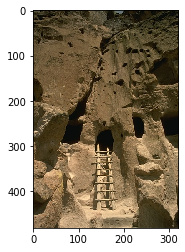

118020.jpg


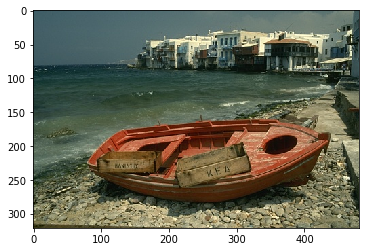

80099.jpg


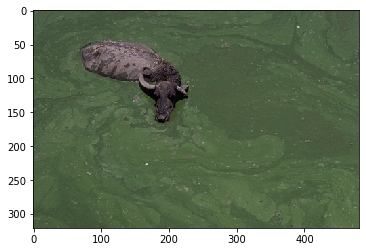

176039.jpg


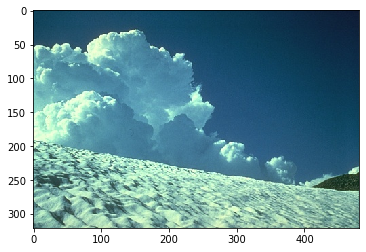

65074.jpg


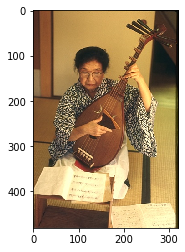

187039.jpg


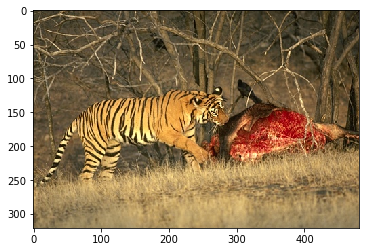

28075.jpg


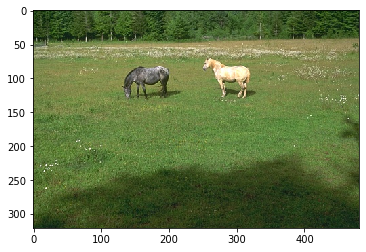

145053.jpg


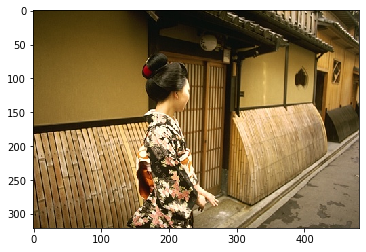

254033.jpg


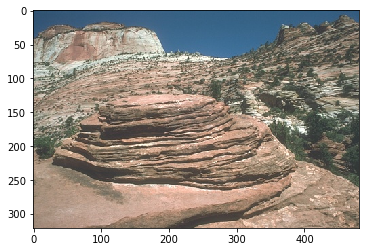

216053.jpg


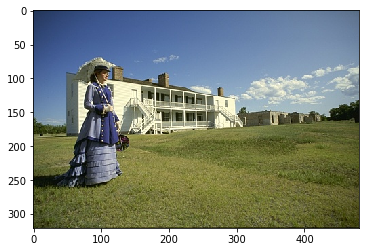

['54005.jpg', '118020.jpg', '80099.jpg', '176039.jpg', '65074.jpg', '187039.jpg', '28075.jpg', '145053.jpg', '254033.jpg', '216053.jpg']


In [5]:
import matplotlib.pyplot as plt
import random
import os  
import matplotlib.image as mpimg
image_list = []
for i in range(10):
    path = r"C:\Users\user\Desktop\test\train"
    random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))])
    print(random_filename)
    image_list.append(random_filename)
    image = mpimg.imread(image_list[i])
    plt.imshow(image)
    plt.show()
print(image_list) 


In [6]:
K = 10 #number of clusters
max_iters = 100 #number of times the k-mean should run

In [7]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [8]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx

In [9]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids


In [10]:
def run_kMean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx


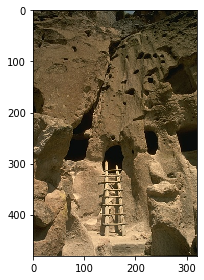

(481, 321, 3)
(481, 321, 3)
(10, 3)
(154401,)
(154401, 3)
(481, 321, 3)


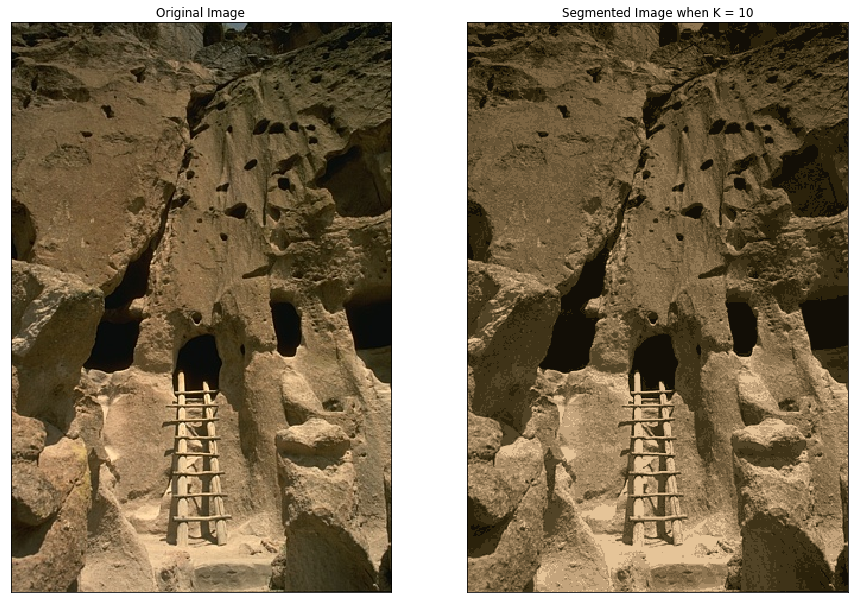

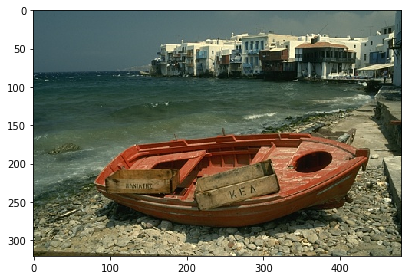

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


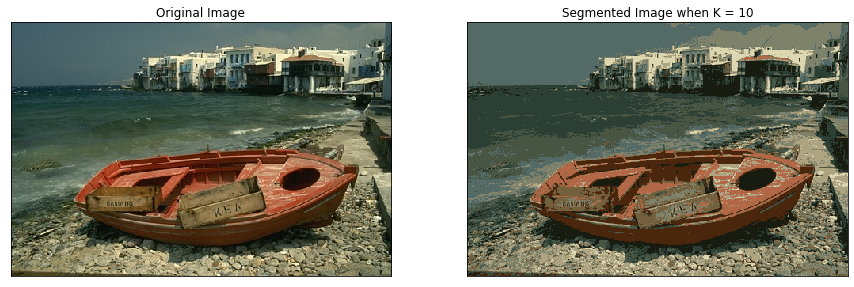

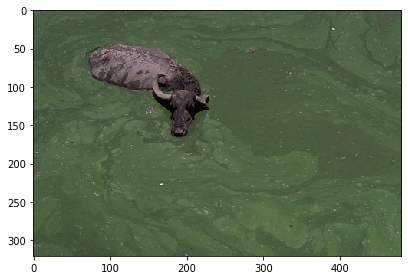

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


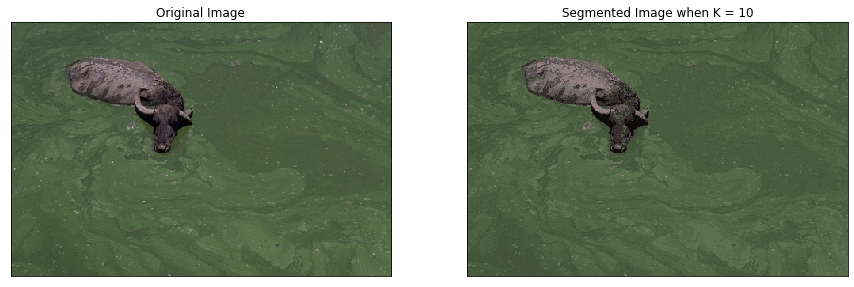

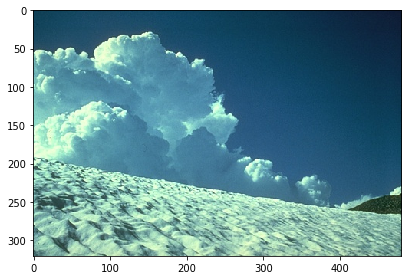

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


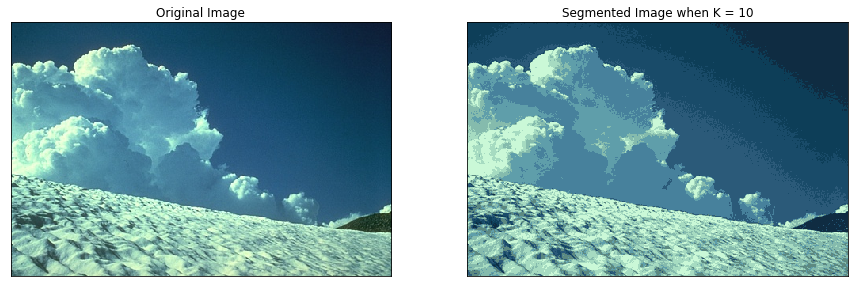

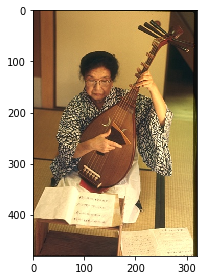

(481, 321, 3)
(481, 321, 3)
(10, 3)
(154401,)
(154401, 3)
(481, 321, 3)


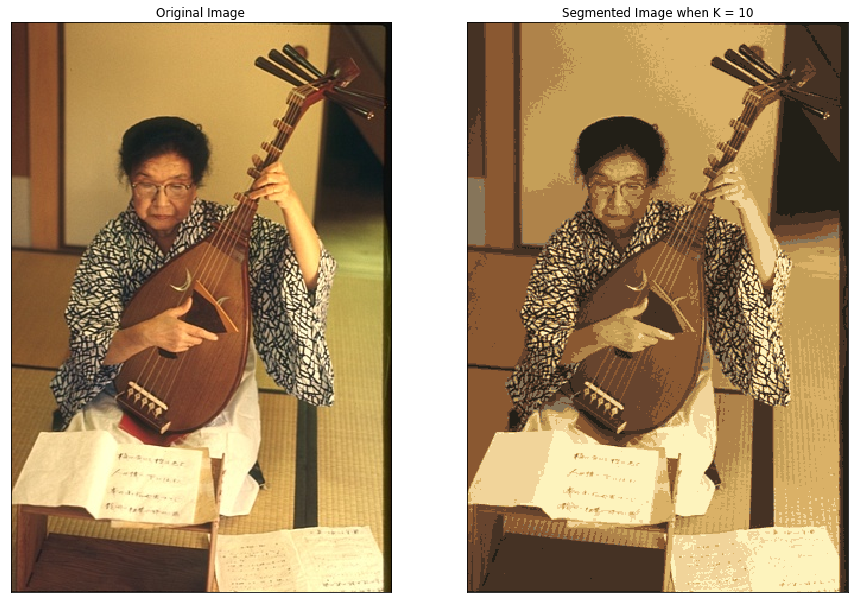

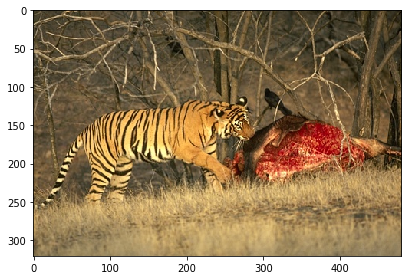

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


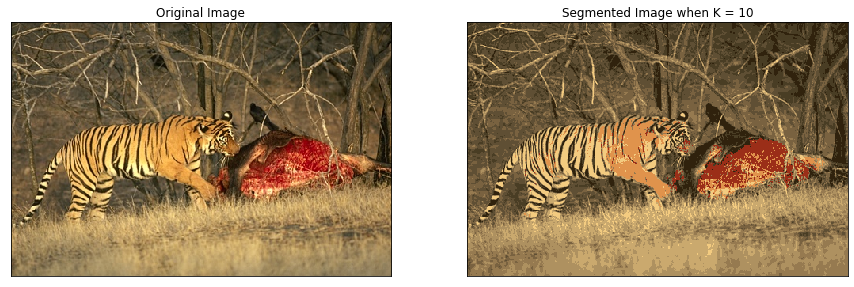

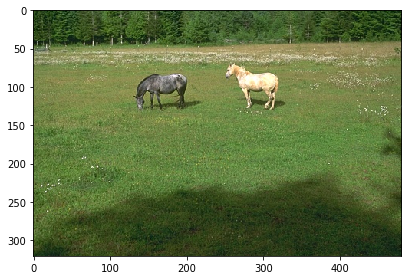

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


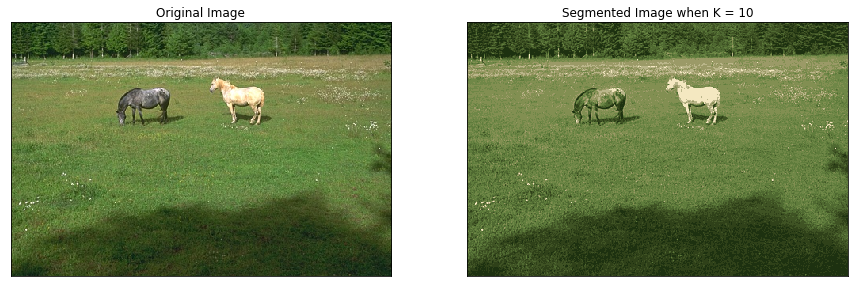

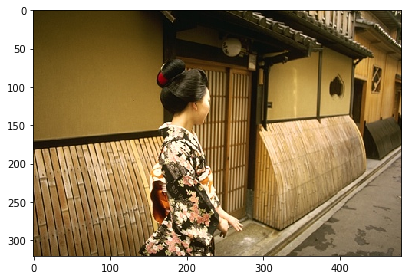

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


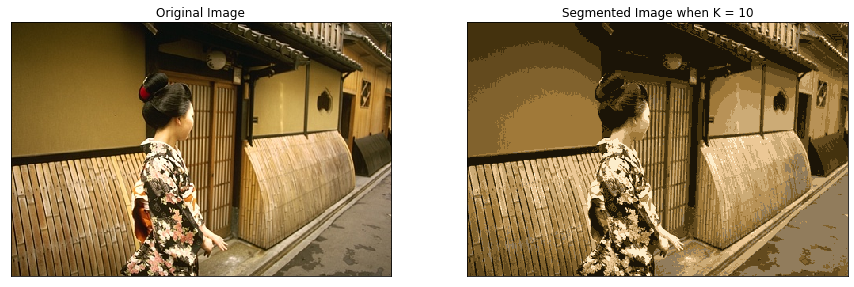

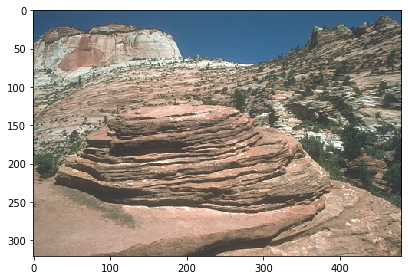

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


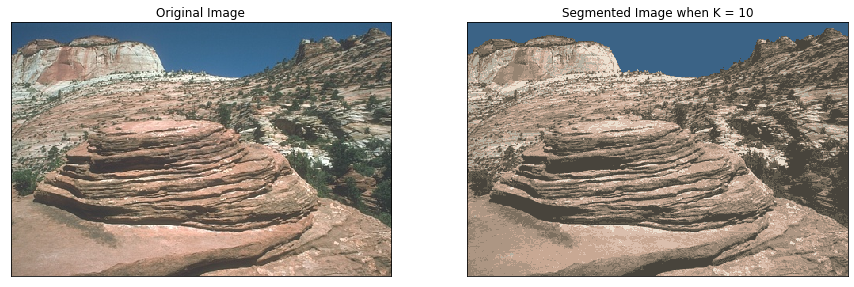

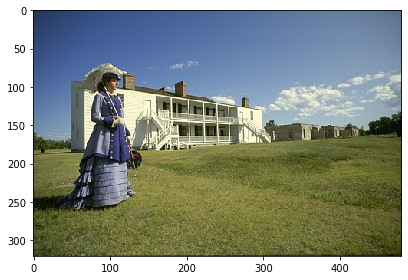

(321, 481, 3)
(321, 481, 3)
(10, 3)
(154401,)
(154401, 3)
(321, 481, 3)


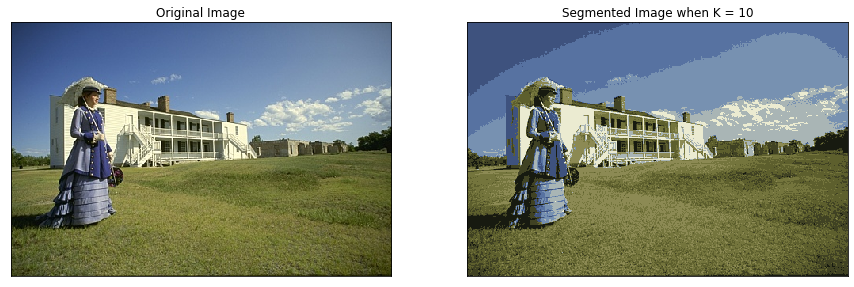

In [11]:
from skimage import io
import numpy as np
import numpy.matlib

for i in range(len(image_list)):
    image = io.imread(image_list[i])
    io.imshow(image)
    io.show()
    print(image.shape)
    
    rows = image.shape[0]
    cols = image.shape[1]
    image = image/255    
    X = image.reshape(image.shape[0]*image.shape[1],3)
    print(image.shape)
    initial_centroids = init_centroids(X,K)
    centroids,idx = run_kMean(X,initial_centroids,max_iters)
    #idx.resize((np.size(X,0),1))
    print(np.shape(centroids))
    print(np.shape(idx))
    idx = closest_centroids(X,centroids)
    X_recovered = centroids[idx]
    print(np.shape(X_recovered))
    X_recovered = np.reshape(X_recovered, (rows, cols, 3))
    print(np.shape(X_recovered))
    import matplotlib.pyplot as plt
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(X_recovered)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()
